# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range? 
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
7. Which giftors provide the most money, in total?

count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64
It seems like most of the gifts are in the 0-100,000 range, with a few outliers in the millions.

 Contract         17274
Monetary Gift    10936
Real Estate         11
Name: Gift Type, dtype: int64
The proportion of contracts is 0.61 
The proportion of monetary gifts is 0.39 
The proportion of estates is 0.0004


c:\Users\elain\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)



top 15 countries in number of gifts
 ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: Country of Giftor, dtype: int64

top 15 countries in amount given
 Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA            

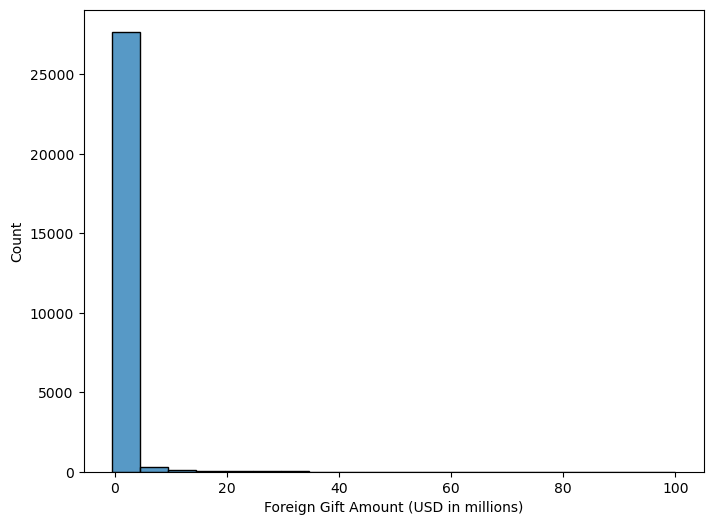

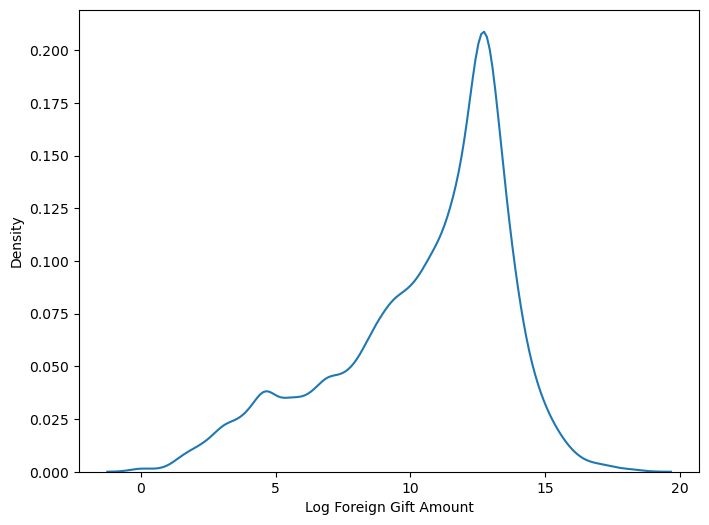

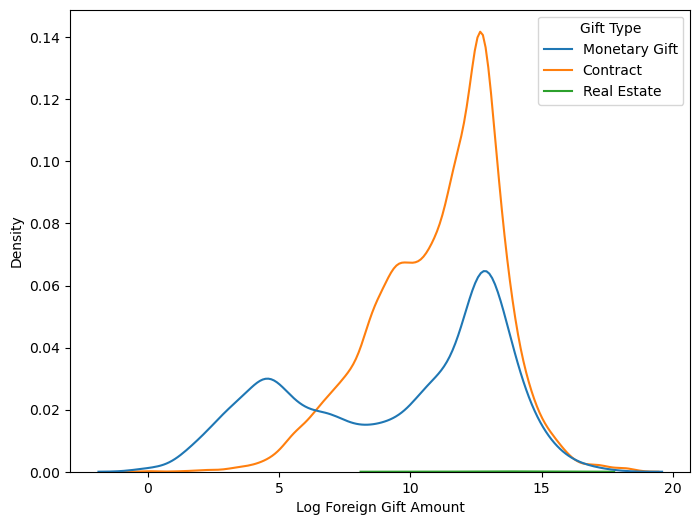

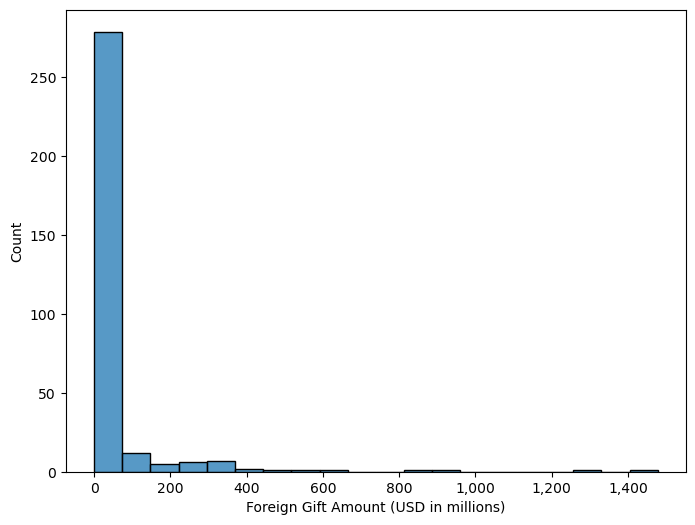

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as mtick

#1. 
df = pd.read_csv('./data/ForeignGifts_edu.csv') #read in data table
#2. 
print(df['Foreign Gift Amount'].describe()) #describe variable
plt.figure(figsize=(8, 6))
sns.histplot(df['Foreign Gift Amount']/1000000, bins = 20) #plot histogram of foreign gift amount
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('Foreign Gift Amount (USD in millions)')
plt.ylabel('Count')
print('It seems like most of the gifts are in the 0-100,000 range, with a few outliers in the millions.')
#3. 
gift_type_vc = df['Gift Type'].value_counts() #count the number of each gift type
print('\n', gift_type_vc)
contract_prop = round(gift_type_vc['Contract'] / gift_type_vc.sum(), 2) #prop of contracts
monetary_prop = round(gift_type_vc['Monetary Gift'] / gift_type_vc.sum(), 2) #rop of gifts
estate_prop = round(gift_type_vc['Real Estate'] / gift_type_vc.sum(), 4) #prop of estates
print('The proportion of contracts is', contract_prop, '\nThe proportion of monetary gifts is', monetary_prop, '\nThe proportion of estates is', estate_prop)
#4. 
df['Log Foreign Gift Amount'] = np.log(df['Foreign Gift Amount']) #add column for log in data
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Log Foreign Gift Amount']) #plot log of foreign gift amount
plt.figure(figsize=(8, 6))
sns.kdeplot(df, x='Log Foreign Gift Amount', hue = 'Gift Type') #plot foreign gift amount
#5
country_vc = df['Country of Giftor'].value_counts() #count number of gifts by giftor
print('\ntop 15 countries in number of gifts\n', country_vc.head(15)) #top 15 in number
country_amt = df.groupby('Country of Giftor')['Foreign Gift Amount'].sum() #group by giftor and sum amount
print('\ntop 15 countries in amount given\n', country_amt.sort_values(ascending=False).head(15)) #sort and print top 15
#6
instit_amt = df.groupby('Institution Name')['Foreign Gift Amount'].sum() #group by institution and sum amount
print('\ntop 15 institutions in amount received\n', instit_amt.sort_values(ascending=False).head(15)) #sort and print top 15
plt.figure(figsize=(8, 6))
sns.histplot(instit_amt/1000000, bins = 20) #total amount received by institutions
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('Foreign Gift Amount (USD in millions)')
plt.ylabel('Count')
#7. 
giftor_amt = df.groupby('Giftor Name')['Foreign Gift Amount'].sum() #group by giftor and sum amount
print('\ntop 10 giftors in amount given\n', giftor_amt.sort_values(ascending=False).head(10))



**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

dimensions of data (30478, 13)
    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1     Apartment                         NaN     Private room  11206.0   1.0   
2     Apartment                         NaN     Private room  10032.0   1.0   
3     Apartment                         NaN  Entire home/apt  10024.0   3.0   
4     Apartment                        95.0     Private room  10036.0   3.0   

   Number of Records  Number Of

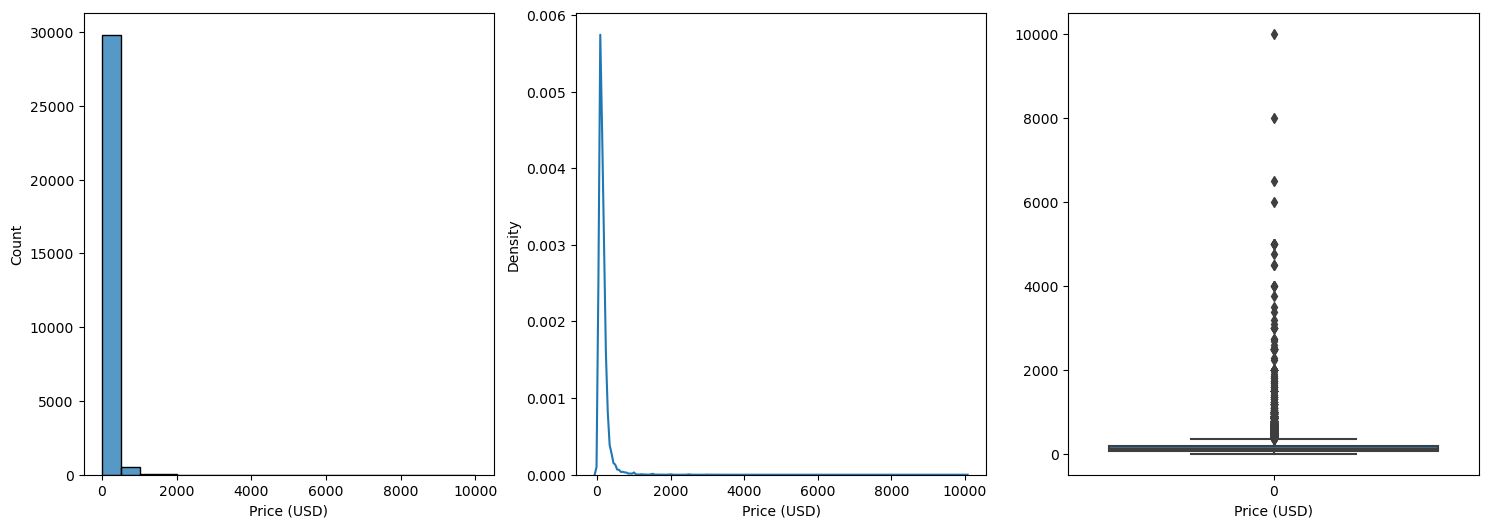

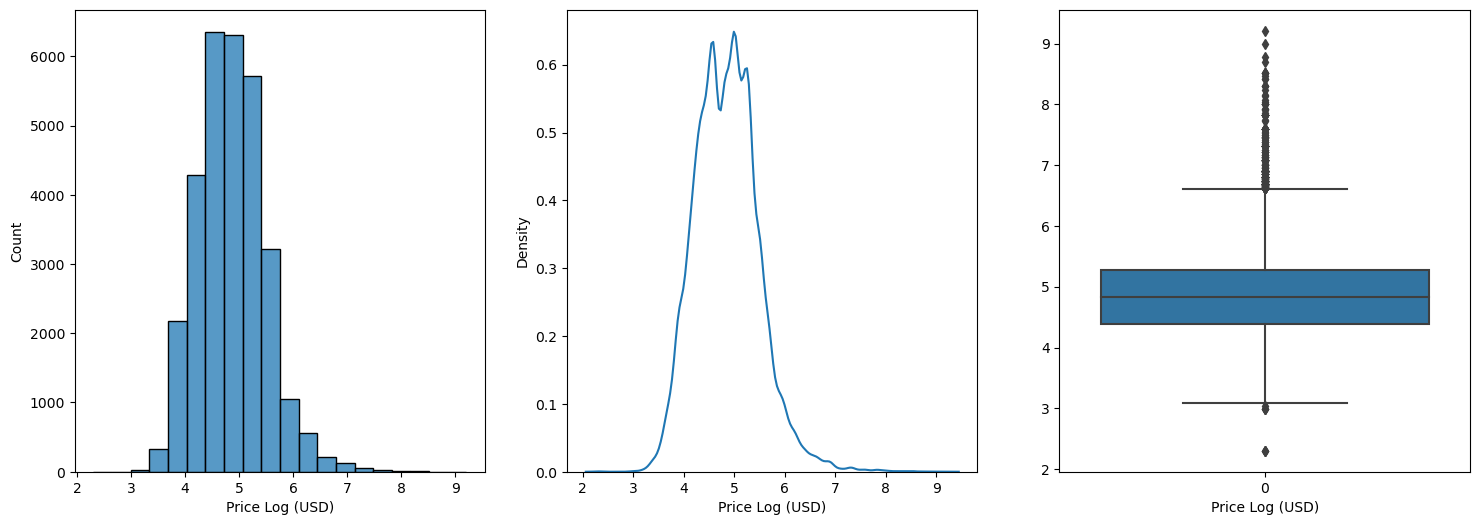

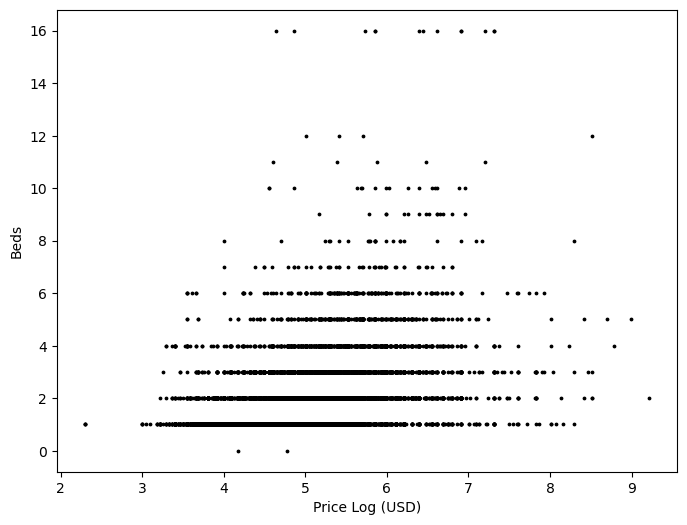

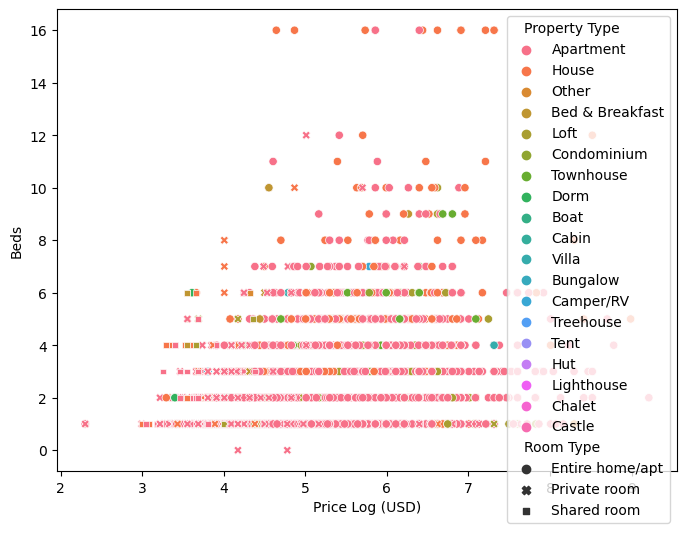

<Figure size 800x600 with 0 Axes>

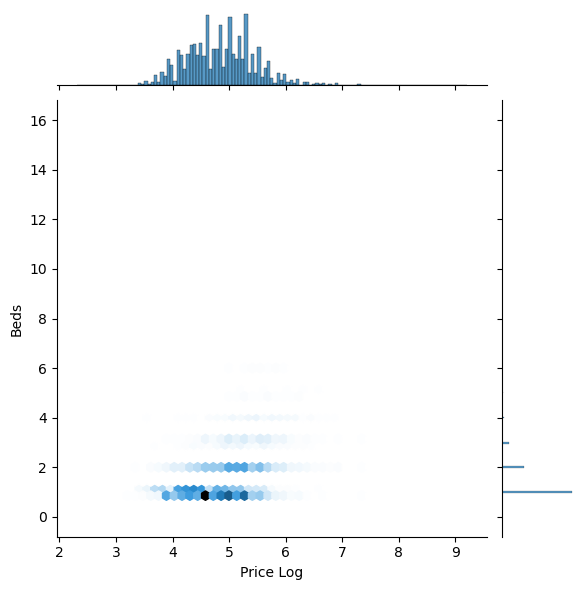

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as mtick
#1. 
df = pd.read_csv('./data/airbnb_hw.csv') #read in data table
df['Price'] = df['Price'].str.replace(',', '').astype(float) #clean price variable
#2. 
print('dimensions of data', df.shape) #dimensions of data
print(df.head())
#3. 
print('\n', pd.crosstab(df['Room Type'], df['Property Type'])) #crosstabulate
print('I noticed that most airbnb rentals are apartments. For bed and breakfasts, houses, castles, chalets, tent, treehouse, dorm, and tents, private rooms are more popular than renting the whole property.')
#4.
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
sns.histplot(df['Price'], bins = 20, ax = axs[0]) #plot histogram of price
axs[0].set_xlabel('Price (USD)')
axs[0].set_ylabel('Count')
sns.kdeplot(df['Price'], ax=axs[1]) #plot kernel density of price
axs[1].set_xlabel('Price (USD)')
axs[1].set_ylabel('Density')
sns.boxplot(df['Price'], ax=axs[2]) #plot boxplot of price
axs[2].set_xlabel('Price (USD)')
print('\n', df['Price'].describe()) #describe price variable
print('the data has many outliers, most likely the airbnbs that are renting out the castle or chalet')
df['Price Log'] = np.log(df['Price']) #add column for log 
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
sns.histplot(df['Price Log'], bins = 20, ax = axs[0]) #plot histogram of price log
axs[0].set_xlabel('Price Log (USD)')
axs[0].set_ylabel('Count')
sns.kdeplot(df['Price Log'], ax=axs[1]) #plot kernel density of price log
axs[1].set_xlabel('Price Log (USD)')
axs[1].set_ylabel('Density')
sns.boxplot(df['Price Log'], ax=axs[2]) #plot boxplot of price log
axs[2].set_xlabel('Price Log (USD)')
print('\n', df['Price Log'].describe()) #describe price variable
print('the data after taking the log of price is much more evenly distributed')
#5.
plt.figure(figsize=(8, 6))
plt.scatter(df['Price Log'], df['Beds'], s=3, color = 'k') #scatterplot of price log and beds
plt.xlabel('Price Log (USD)')
plt.ylabel('Beds')
print('\n', df.groupby('Beds')['Price'].describe()) #describe price by number of beds
print('average price of beds varies quite a bit. The price of 1 bed is significantly higher than the price of 2. Rentals with 16 beds are suprisingly cheap. The standard deviation is pretty normal, except for the 12 bed rentals')
#6.
plt.figure(figsize=(8, 6))
sns.scatterplot(data = df, x = 'Price Log', y = 'Beds', style = 'Room Type', hue = 'Property Type') #scatterplot of price with room and property types
plt.xlabel('Price Log (USD)')
plt.ylabel('Beds')
print('\n', df.groupby(['Room Type', 'Property Type'])['Price'].describe()) #describe price by room and property type
print('On average, entire home/apt of a cabin or villa have the highest prices on average. Entire home/apt also has the highest standard deviations. In this case, the median might be a better estimate of central tendency because there are so many outliers. ')
#7
plt.figure(figsize=(8, 6))
sns.jointplot(data = df, x = 'Price Log', y = 'Beds', kind = 'hex') #jointplot of price and beds
print('the data is actually distributed mostly when the price log of the rental is around 4.5 and the number of beds is 1-3. It is easier to see here because of the heatmap, rather than the intense clustering in the plots in 5 and 6')




**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.